In [1]:
import networkx as nx
from pgmpy.base.DAG import DAG
import matplotlib.pyplot as plt
import pandas as pd


In this practical session, we will cover the following topics:
- Graph Generation and Plotting
- Simulation studies for common causal fallacies
  - Fork paths
  - Collider bias

# Graph Generation and Plotting

The following DAG is due to Judea Pearl.
We will use it to illustrate how to generate a graph and plot it.
We will also show how to compute the ancestors and descendants of a node.

In [2]:
digraph = nx.DiGraph(
    [
        ("Z1", "X1"),
        ("X1", "D"),
        ("Z1", "X2"),
        ("Z2", "X3"),
        ("X3", "Y"),
        ("Z2", "X2"),
        ("X2", "Y"),
        ("X2", "D"),
        ("M", "Y"),
        ("D", "M"),
    ]
)

In [3]:
G = DAG(digraph)

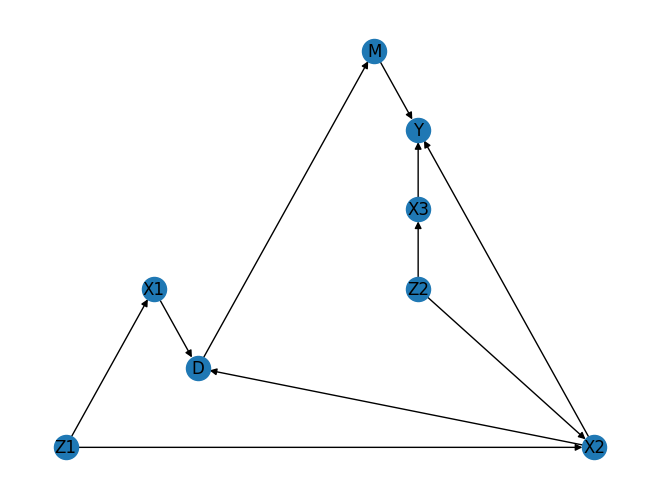

In [4]:
nx.draw_planar(G, with_labels=True)
plt.show()

In [5]:
print(list(G.predecessors("X2")))
print(list(G.successors("X2")))
print(list(nx.ancestors(G, "X2")))
print(list(nx.descendants(G, "X2")))

['Z1', 'Z2']
['Y', 'D']
['Z2', 'Z1']
['M', 'D', 'Y']


In [6]:
# Find Paths Between D and Y
list(nx.all_simple_paths(G.to_undirected(), "D", "Y"))

[['D', 'X1', 'Z1', 'X2', 'Y'],
 ['D', 'X1', 'Z1', 'X2', 'Z2', 'X3', 'Y'],
 ['D', 'M', 'Y'],
 ['D', 'X2', 'Y'],
 ['D', 'X2', 'Z2', 'X3', 'Y']]

In [7]:
# These returns all conditional independencies even among two sets of variables
# conditional on a third set
dseps = G.get_independencies()
# we display only the ones that correpond to pairs of singletons
for dsep in dseps.get_assertions():
    if len(dsep.get_assertion()[1]) == 1:
        print(dsep)

(Y ⟂ X1 | X2, D, Z1)
(Y ⟂ Z2 | X2, X3, Z1)
(Y ⟂ D | M, X2, X1)
(Y ⟂ Z1 | X2, Z2, X1)
(Y ⟂ X1 | X2, D, Z1, M)
(Y ⟂ X1 | X2, D, Z2, Z1)
(Y ⟂ Z1 | X2, D, Z2, X1)
(Y ⟂ D | X1, X2, Z1, M)
(Y ⟂ Z2 | X1, X2, X3, Z1)
(Y ⟂ Z1 | X2, Z2, X3, X1)
(Y ⟂ Z2 | Z1, X2, D, X3, X1)
(Y ⟂ X1 | M, Z1, X2, D, Z2)
(Y ⟂ X1 | Z1, X2, D, X3, Z2)
(Y ⟂ Z1 | M, X2, D, X1, Z2)
(Y ⟂ Z1 | X2, D, X1, X3, Z2)
(Y ⟂ D | M, Z2, Z1, X2, X1)
(Y ⟂ Z2 | M, Z1, X2, D, X3, X1)
(Y ⟂ X1 | M, Z1, X2, D, X3, Z2)
(Y ⟂ Z1 | M, Z2, X2, D, X3, X1)
(Y ⟂ D | M, Z2, Z1, X2, X3, X1)
(M ⟂ X3 | Z2)
(M ⟂ X3 | X2, Z2)
(M ⟂ X3 | Z2, Z1)
(M ⟂ X3 | Z2, X1)
(M ⟂ Z2 | X2, X3, Z1)
(M ⟂ X3 | X2, Z2, Z1)
(M ⟂ X3 | X1, Z2, Z1)
(M ⟂ X1 | X2, D, Y, Z1)
(M ⟂ Z2 | X2, Y, X3, Z1)
(M ⟂ Z1 | X2, Y, Z2, X1)
(M ⟂ Z2 | X1, X2, X3, Z1)
(M ⟂ X3 | X1, X2, Z2, Z1)
(M ⟂ Z1 | X2, Z2, X3, X1)
(M ⟂ X1 | Y, Z1, X2, D, Z2)
(M ⟂ Z1 | Y, X2, D, X1, Z2)
(M ⟂ Z2 | Z1, X2, D, X3, X1)
(M ⟂ X3 | Z1, X2, D, X1, Z2)
(M ⟂ X1 | Z1, X2, D, X3, Z2)
(M ⟂ Z1 | X2, D, X1, X3, Z2)
(M ⟂ X2 

# Simulation studies

## A fork of icecream under the sun

[Credits to Prof. Reza Arghandeh](https://github.com/Ci2Lab/Applied_Causal_Inference_Course/blob/main/lectures/CH-3-Graphical-Causal-Models.ipynb)

In hot summer months, people tend to consume more ice cream and are also more
likely to get sunburns. While it might seem that Ice Cream Consumption (I) and
 Number of Sunburns (S) are related, this relationship is actually driven by a
third variable, Hot Temperature (H).

### Causal graph for icecream and sunburns

- TODO: Draw the causal graph corresponding to the causal relationships
between these variables.

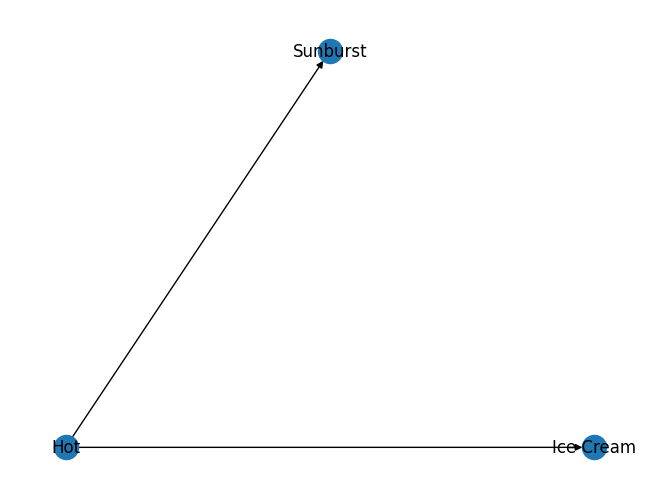

In [8]:
digraph = nx.DiGraph(
    [
        ("Hot", "Ice Cream"),
        ("Hot", "Sunburst"),
    ]
)
G = DAG(digraph)
nx.draw_planar(G, with_labels=True)
plt.show()

### Simulate the data for icecream and sunburns
Let's generate synthetic data for the three variables:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Hot Temperature (T)
hot_temperature = np.random.normal(
    loc=30, scale=5, size=100
)  # Average temperature of 30 degrees with some variation

# Simulating Ice Cream Consumption (I) based on Temperature (T)
ice_cream_consumption = 2 * hot_temperature + np.random.normal(
    loc=0, scale=5, size=100
)  # Higher temperature, more ice cream

# Simulating Number of Sunburns (S) based on Temperature (T)
number_of_sunburns = 1.5 * hot_temperature + np.random.normal(
    loc=0, scale=3, size=100
)  # Higher temperature, more sunburns

# Creating a DataFrame for the data
data = pd.DataFrame(
    {
        "hot_temperature": hot_temperature,
        "ice_cream_consumption": ice_cream_consumption,
        "number_sunburns": number_of_sunburns,
    }
)

# Display the first few rows of the dataset
data.head()

,hot_temperature,ice_cream_consumption,number_sunburns
0,32.483571,57.890288,49.798718
1,29.308678,56.514130,45.645371
2,33.238443,64.763313,53.106818
3,37.615149,71.218912,59.584130
4,28.829233,56.852038,39.110842


### Visualize the relationships between icecream and sunburns
We now use a scatter plot matrix to visualize the pairwise relationships
between Hot Temperature, Ice Cream Consumption, and Number of Sunburns.

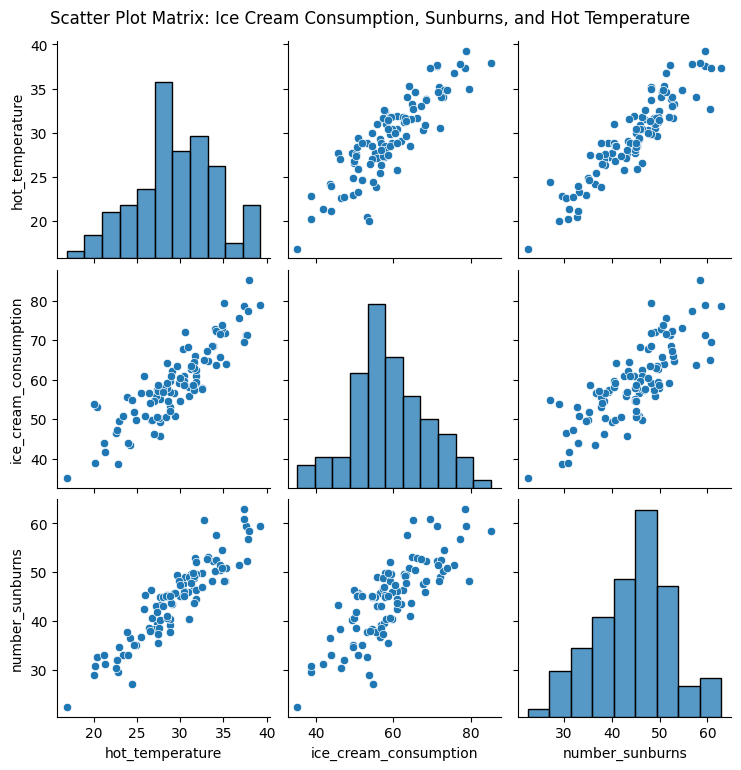

In [10]:
# - TODO: Visualize the scatter plot matrix for the data. You can use the
# pairplot function from seaborn.
sns.pairplot(data)
plt.suptitle(
    "Scatter Plot Matrix: Ice Cream Consumption, Sunburns, and Hot Temperature", y=1.02
)
plt.show()

### Regression analysis for icecream and sunburns
First let's begin by a naive regression analysis between Ice Cream Consumption
 and Number of Sunburns.

In [11]:
import statsmodels.formula.api as smf

# Resizualized with Hot Temperature
naive_fit = smf.ols("number_sunburns ~ ice_cream_consumption", data).fit()
print(naive_fit.summary())

                            OLS Regression Results                            
Dep. Variable:        number_sunburns   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     173.6
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           2.04e-23
Time:                        14:29:38   Log-Likelihood:                -299.48
No. Observations:                 100   AIC:                             603.0
Df Residuals:                      98   BIC:                             608.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.88

We see that the coefficient for ice_cream_consumption is positive and
statistically significant. This might lead us to believe that ice cream
consumption causes sunburns. However, this is not the case. The relationship
 between ice cream consumption and sunburns is confounded by hot temperature.
 Let's see what happens when we control for hot temperature.

In [12]:
# ### Resizualized with Hot Temperature
# - TODO: Perform a regression analysis for both the ice cream and the number of
#  sun burns to *regress away* the effect of the hot_temperature.
# Regression for ice_cream_consumption
ice_cream_ols = smf.ols("ice_cream_consumption ~ hot_temperature", data).fit()
print(ice_cream_ols.summary())
ice_cream_debiased = data["ice_cream_consumption"] - ice_cream_ols.predict(
    data[["hot_temperature"]]
)
# Regression for number_sunburns
sun_burns_ols = smf.ols("number_sunburns ~ hot_temperature", data).fit()
print(sun_burns_ols.summary())
sunburns_debiased = data["number_sunburns"] - sun_burns_ols.predict(
    data[["hot_temperature"]]
)

                              OLS Regression Results                             
Dep. Variable:     ice_cream_consumption   R-squared:                       0.761
Model:                               OLS   Adj. R-squared:                  0.759
Method:                    Least Squares   F-statistic:                     312.2
Date:                   Tue, 11 Mar 2025   Prob (F-statistic):           3.14e-32
Time:                           14:29:38   Log-Likelihood:                -296.65
No. Observations:                    100   AIC:                             597.3
Df Residuals:                         98   BIC:                             602.5
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

Lets's vizualize the debiased data.

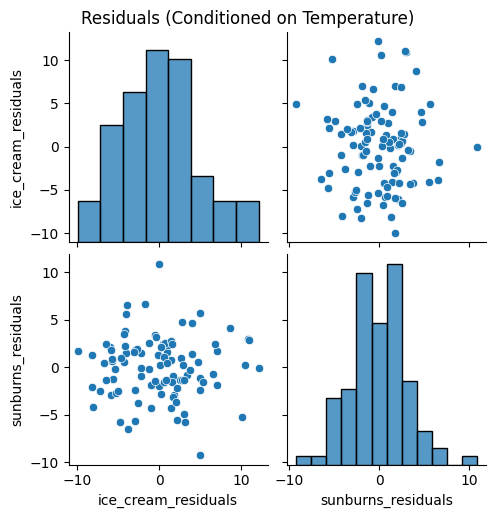

In [13]:
residuals_data = pd.DataFrame(
    {
        "ice_cream_residuals": ice_cream_debiased,
        "sunburns_residuals": sunburns_debiased,
    }
)
# ## Visualize the residuals (relationship after conditioning)
sns.pairplot(residuals_data)
plt.suptitle("Residuals (Conditioned on Temperature)", y=1.02)
plt.show()

## Debiased regression

In [14]:
print(
    smf.ols("sunburns_residuals ~ ice_cream_residuals", residuals_data).fit().summary()
)

                            OLS Regression Results                            
Dep. Variable:     sunburns_residuals   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.01164
Date:                Tue, 11 Mar 2025   Prob (F-statistic):              0.914
Time:                        14:29:38   Log-Likelihood:                -257.48
No. Observations:                 100   AIC:                             519.0
Df Residuals:                      98   BIC:                             524.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.742e-14    

The coefficient for ice_cream_residuals is now close to zero and not
statistically significant. This suggests that the relationship between ice
cream consumption and number of sunburns is spurious and driven by hot
temperature.

# Collider bias for celebrities at Hollywood

Here is a simple example to illustate the collider or M-bias.
Credits to [Chernozhulov et al., 2024, Causal ML book](https://www.causalml-book.org/).

The idea is that people who get to Hollywood tend to have a high
congenility = talent + beauty. Funnily enough this induces a negative
correlation between talents and looks, when we condition on the set of actors
or celebrities.

This simple example explains an anecdotal observation that "talent and beauty
are negatively correlated" for celebrities.
This is a form of collider bias, also coined as selection bias for this specific case.

### Causal graph for celebrities at Hollywood

- TODO: Draw the graph the graph corresponding to the causal relationships between these variables.

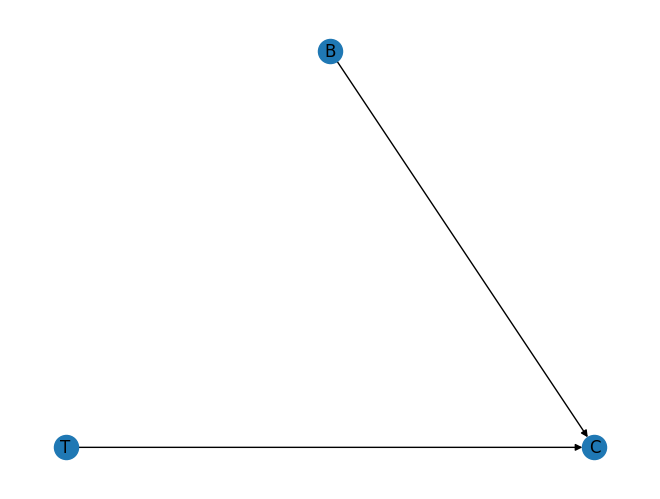

In [15]:
digraph = nx.DiGraph([("T", "C"), ("B", "C")])
g = DAG(digraph)

nx.draw_planar(g, with_labels=True)
plt.show()

### Simulate the data for celebrities at Hollywood

In [16]:
np.random.seed(123)
num_samples = 10000
talent = np.random.normal(size=num_samples)
beauty = np.random.normal(size=num_samples)
congeniality = talent + beauty + np.random.normal(size=num_samples)  # congeniality
hollywood_data = pd.DataFrame(
    {
        "talent": talent,
        "beauty": beauty,
        "congeniality": congeniality,
    }
)
# Create the conditional variable: celebrity is True if congeniality > 2
hollywood_data["celebrity"] = hollywood_data["congeniality"] > 2

### Visualize the relationships for celebrities at Hollywood
- TODO: Visualize the pairplot :
 - for the whole data.
 - only for the celebrities.

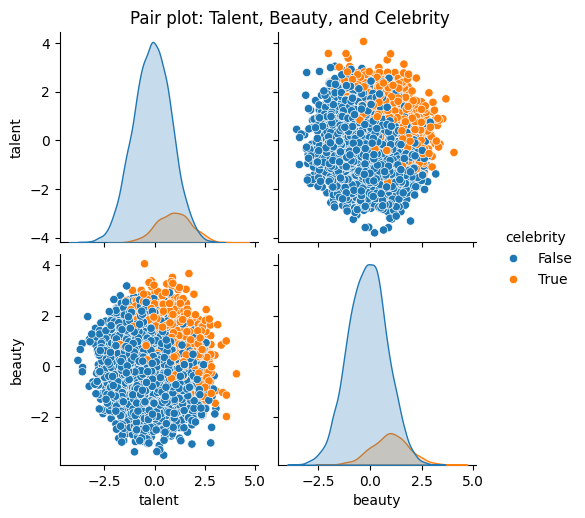

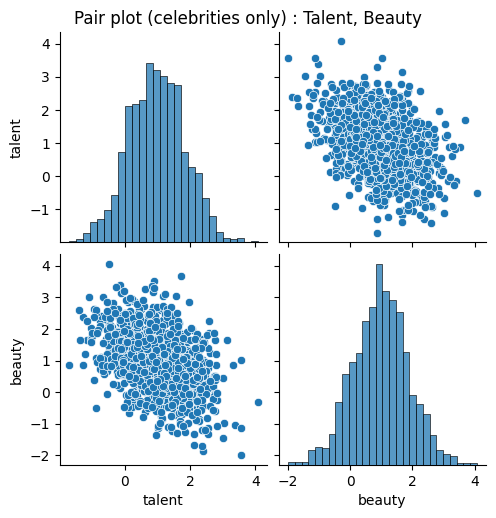

In [17]:
sns.pairplot(
    hollywood_data[["talent", "beauty", "celebrity"]],
    hue="celebrity",
)
plt.suptitle("Pair plot: Talent, Beauty, and Celebrity", y=1.02)
plt.show()

celebrity_data = hollywood_data.loc[hollywood_data["celebrity"] == 1]
sns.pairplot(celebrity_data[["talent", "beauty"]])
plt.suptitle("Pair plot (celebrities only) : Talent, Beauty", y=1.02)
plt.show()

We see that for the whole data, there is no correlation between talent and
beauty. However, when we condition on the set of celebrities, we see a
negative correlation between talent and beauty. This is an example of collider
bias.

### Regression analysis for celebrities at Hollywood
Recover what we have seen in the pairplot, that is, the negative correlation
between talent and beauty for celebrities.
- TODO: Perform regression analysis to show the collider bias. You should
contrast a regression analysis for the whole data and for the celebrities only.
print(smf.ols("talent ~ beauty", hollywood_data).fit().summary())

In [18]:
print(smf.ols("talent ~ beauty", celebrity_data).fit().summary())
print(smf.ols("talent ~ beauty + congeniality", hollywood_data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 talent   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           7.54e-46
Time:                        14:29:40   Log-Likelihood:                -1438.6
No. Observations:                1220   AIC:                             2881.
Df Residuals:                    1218   BIC:                             2891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3260      0.033     39.936      0.0

Talent and beauty are not correlated in the whole data. This is expected since in the causal graph, they are independent.

However, when we condition on the set of celebrities, we see a negative correlation between talent and beauty. This is an example of collider bias.

Note that this correlation can be found again if we perform a regression of talent on beauty AND congeniality.